In [ ]:
from google.colab import drive
from zipfile import ZipFile
import os

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Specify the path to the zipped file in your Google Drive
zip_file_path = "/content/drive/Shareddrives/DATA 298A/Code/Data/LargeFiles/data.zip"

In [ ]:
# Specify the extraction path
extracted_dir_path = "/content/dataset"

In [ ]:
# Create the extraction directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

In [ ]:

# Extract the zip file
try:
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir_path)
    print("Extraction successful.")
except FileNotFoundError:
    print("File not found. Double-check the file path.")
except Exception as e:
    print(f"An error occurred during extraction: {e}")


Extraction successful.


In [ ]:
# List the contents of the extraction directory
print("Extracted files:")
print(os.listdir(extracted_dir_path))


Extracted files:
['train_val_test']


In [ ]:

# Specify the base directory containing your dataset
base_dir = extracted_dir_path

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
# Define the path to your data
train_data_dir = '/content/dataset/data/data/train'
validation_data_dir = '/content/dataset/data/data/val'
test_data_dir = '/content/dataset/data/data/test'

In [ ]:

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:
train_dataset = image_dataset_from_directory(train_data_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42,
                                             label_mode='int')

Found 27500 files belonging to 11 classes.
Using 22000 files for training.


In [ ]:
validation_dataset = image_dataset_from_directory(train_data_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42,
                                             label_mode='int')

Found 27500 files belonging to 11 classes.
Using 5500 files for validation.


In [ ]:
test_dataset = image_dataset_from_directory(test_data_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             seed=42,
                                             label_mode='int')

Found 2001 files belonging to 11 classes.


In [ ]:
# Determine class names from directory structure
class_names = sorted(os.listdir(train_data_dir))

tf.Tensor(
[ 4  2  1  8  0  6  0  6  1  9  5  4  2  1  5 10  2  2  5 10  0  0  0  8
  9  3  3  2  9  6  3  1], shape=(32,), dtype=int32)


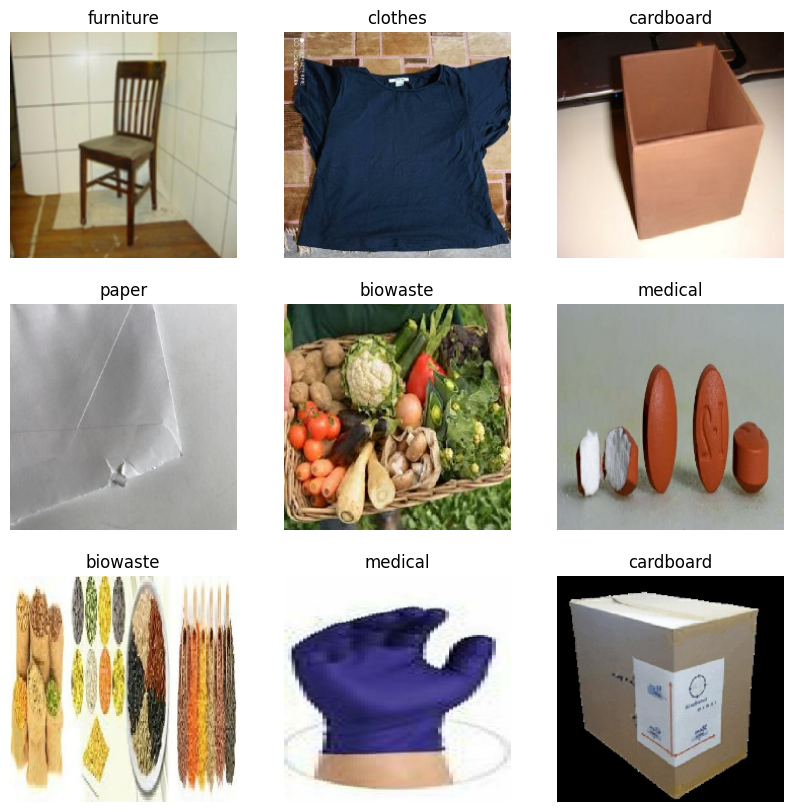

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    print(labels)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [ ]:
# Load Xception pre-trained on ImageNet
base_model = Xception(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(11, activation='softmax')(x)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Fine-tune the model on your data
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_dataset, validation_data=validation_dataset, epochs=1, verbose=2)


688/688 - 25326s - loss: 0.4146 - accuracy: 0.8773 - val_loss: 0.1630 - val_accuracy: 0.9484 - 25326s/epoch - 37s/step


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/xception_model.h5')

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_accuracy}')


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/xception_model.h5')


In [ ]:
predictions = loaded_model.predict(test_dataset)


63/63 [==============================] - 468s 7s/step


In [ ]:
predictions

array([[4.3421234e-03, 1.8368541e-03, 2.3488133e-04, ..., 9.5748907e-01,
        5.8638128e-03, 6.4193911e-04],
       [3.8886184e-04, 9.8242539e-01, 5.0736731e-04, ..., 6.0379095e-03,
        6.5906835e-03, 4.7783816e-04],
       [2.2597020e-02, 5.5671191e-01, 8.2960902e-03, ..., 7.7417240e-02,
        6.4920418e-02, 4.1929916e-02],
       ...,
       [6.2430790e-04, 4.3196629e-05, 4.6549409e-05, ..., 9.1256908e-05,
        1.6371827e-03, 1.5504776e-05],
       [7.4887656e-05, 3.4400535e-05, 9.9899697e-01, ..., 9.2581744e-05,
        2.8438965e-04, 6.7491936e-05],
       [1.5844109e-03, 2.3737836e-04, 4.2392360e-04, ..., 2.0625244e-04,
        1.2218607e-04, 9.9651706e-01]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to get class labels
def get_class_label(class_names, index):
    return class_names[index]

# Get class names from directory structure
class_names = sorted(os.listdir(train_data_dir))

# Display the images along with their predicted labels
num_images_to_display = min(len(images), 9)  # Display up to 9 images

plt.figure(figsize=(15, 15))
for i in range(num_images_to_display):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    true_label = get_class_label(class_names, labels[i])
    predicted_label = get_class_label(class_names, predicted_labels[i])
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis("off")

plt.show()

In [ ]:
# Function to display images with true and predicted labels
def display_images_with_labels(images, true_labels, predicted_labels, class_names):
    num_images = len(images)
    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        img = images[i].numpy().astype("uint8")
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)

        # Get true and predicted labels
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]

        # Display labels
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis("off")

    plt.show()